In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# create image path, if the path already exists, skip
from pathlib import Path

# image_path = Path(__file__).resolve().parent() / "images"
image_path = Path("/content/drive/MyDrive/AI6121_Assignment1/images") # adjustable
if image_path.is_dir():
  print("Image path already exists.")
else:
  print("Creating image path...")
  image_path.mkdir(parents=True, exist_ok=True)
  print("Image path created")

Image path already exists.


In [3]:
# unzip image files to image path
import zipfile

# with zipfile.ZipFile(Path(__file__).resolve().parent() / "sample images.zip", "r") as z:
with zipfile.ZipFile("/content/drive/MyDrive/AI6121_Assignment1/sample images.zip", "r") as z:
  print("Unzipping images")
  z.extractall(image_path)
  print("Images unzipped")

Unzipping images
Images unzipped


Random image path: /content/drive/MyDrive/AI6121_Assignment1/images/sample07.jpg


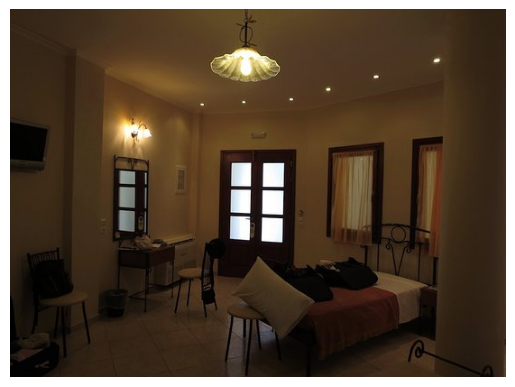

In [4]:
# visualize a random image within the image folder
import random
import cv2
from PIL import Image
import matplotlib.pyplot as plt


def see_random_image(image_path_str: str):
  """
  Input: image folder path
  Output: a random image within the path
  Function: select a random sample image from the image folder
  and show it in the default color format(BGR).
  """
  image_path = Path(image_path_str)
  if image_path.is_dir():
    image_path_list = list(image_path.glob("*"))
    random_image_path = random.choice(image_path_list)
    print(f"Random image path: {random_image_path}")
    random_image = cv2.imread(str(random_image_path))
    # Convert BGR to RGB for displaying with matplotlib
    image_rgb = cv2.cvtColor(random_image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()
    # return image_rgb
  else:
    print("Image path does not exist.")

# see_random_image(Path(__file__).resolve().parent() / "images")
see_random_image("/content/drive/MyDrive/AI6121_Assignment1/images")

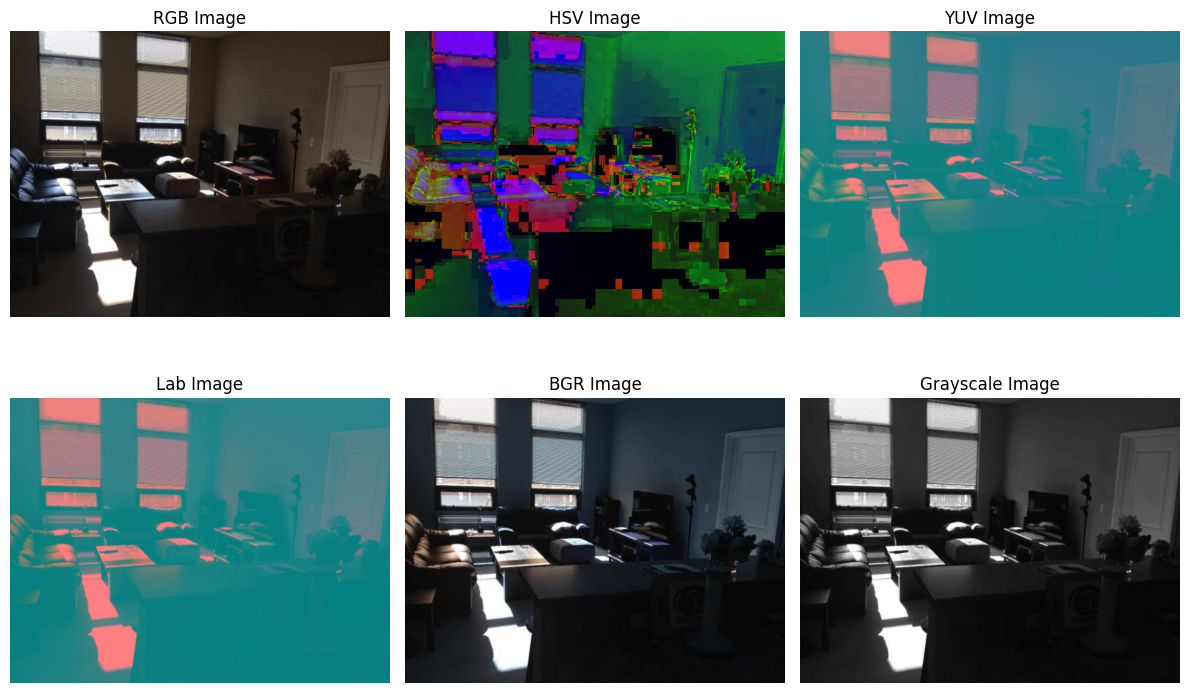

In [5]:
import matplotlib.pyplot as plt

def see_different_image_types(image_path_str: str):
  """
  Input: image path
  Output: the image displayed through different color channels
  Function: Visualize different color channels of the image
  """

  # Load the image in its default BGR format
  image_bgr = cv2.imread(image_path_str)

  # Convert BGR to RGB for displaying with matplotlib
  image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

  # Convert BGR to HSV
  image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

  # Convert BGR to YUV
  image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV)

  # Convert BGR to Lab
  image_lab = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2Lab)

  # Convert BGR to Grayscale
  image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

  # Plot the images using matplotlib
  plt.figure(figsize=(12, 8))

  plt.subplot(2, 3, 1)
  plt.imshow(image_rgb)
  plt.title('RGB Image')
  plt.axis('off')

  plt.subplot(2, 3, 2)
  plt.imshow(image_hsv)
  plt.title('HSV Image')
  plt.axis('off')

  plt.subplot(2, 3, 3)
  plt.imshow(image_yuv)
  plt.title('YUV Image')
  plt.axis('off')

  plt.subplot(2, 3, 4)
  plt.imshow(image_lab)
  plt.title('Lab Image')
  plt.axis('off')

  plt.subplot(2, 3, 5)
  plt.imshow(image_bgr)  # Will look incorrect as it is BGR
  plt.title('BGR Image')
  plt.axis('off')

  plt.subplot(2, 3, 6)
  plt.imshow(image_gray, cmap='gray')
  plt.title('Grayscale Image')
  plt.axis('off')

  plt.tight_layout()
  plt.show()

# see_different_image_types(Path(__file__).resolve().parent() / "images" / "sample01.jpg")
see_different_image_types("/content/drive/MyDrive/AI6121_Assignment1/images/sample06.jpg")

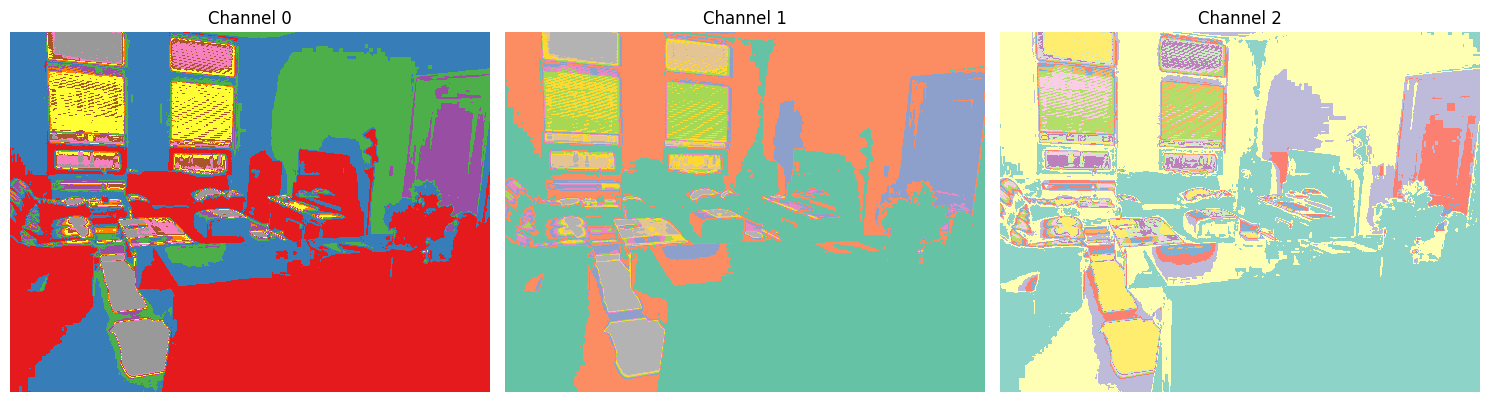

In [6]:
import numpy as np

# visualize different colour channels
def see_image_channels(image_path_str: str):
  """
  Input: image path
  Output: the image displayed through different color channels
  Function: Visualize different color channels of the image
  """
  # Load the image in its default BGR format
  image_bgr = cv2.imread(image_path_str)
  image_array = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
  if image_array is not None:
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(image_array[:, :, 0], cmap='Set1')
    axs[0].set_title('Channel 0')
    axs[0].axis('off')
    axs[1].imshow(image_array[:, :, 1], cmap='Set2')
    axs[1].set_title('Channel 1')
    axs[1].axis('off')
    axs[2].imshow(image_array[:, :, 2], cmap='Set3')
    axs[2].set_title('Channel 2')
    axs[2].axis('off')
    plt.tight_layout()
    plt.show()

# see_image_channels(Path(__file__).resolve().parent() / "images" / "sample01.jpg")
see_image_channels("/content/drive/MyDrive/AI6121_Assignment1/images/sample06.jpg")

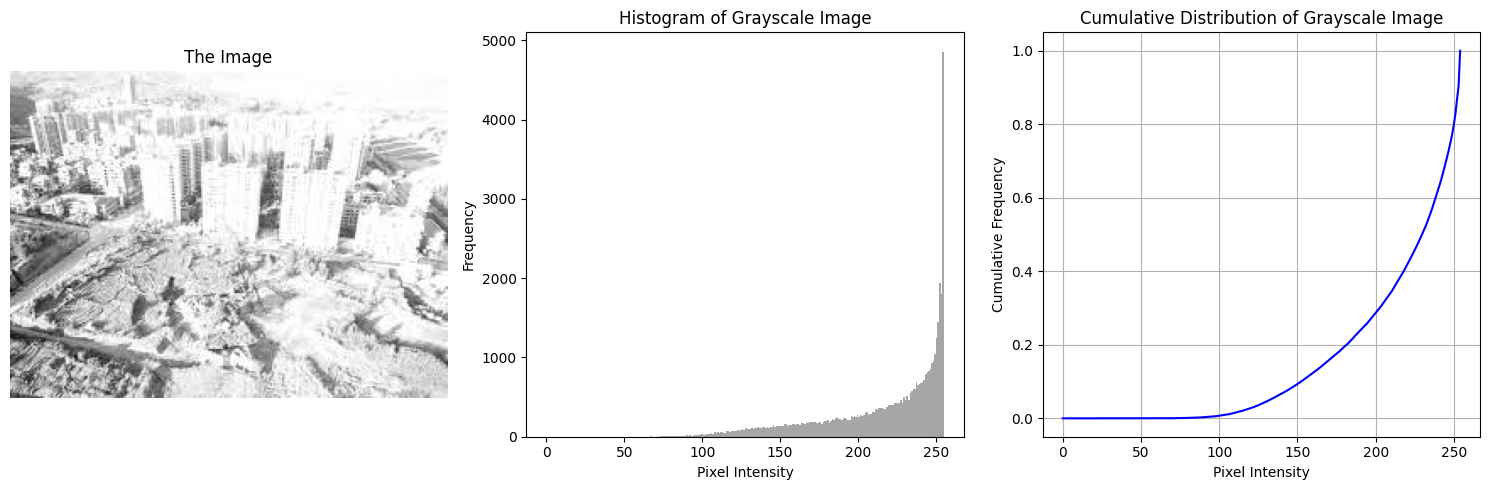

In [7]:
def see_image_hist_cdf_grayscale(image_array, cmap:str="gray"):
  """
  Input: grayscale image array
  Output: the histogram and CDF of the grayscale image
  Function: Visualize the histogram and CDF of the image
  """

  if image_array is not None:
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    # The actual image
    axs[0].imshow(image_array, cmap=cmap)
    axs[0].set_title('The Image')
    axs[0].axis('off')
    # The histogram of the image
    flattened_image = image_array.flatten()
    axs[1].hist(flattened_image, bins=256, range=(0, 255), color='gray', alpha=0.7)
    axs[1].set_title('Histogram of Grayscale Image')
    axs[1].set_xlabel('Pixel Intensity')
    axs[1].set_ylabel('Frequency')
    # The CDF of the image
    histogram, bin_edges = np.histogram(flattened_image, bins=256, range=(0, 255))
    # Compute the cumulative distribution
    cumulative_distribution = np.cumsum(histogram)
    # Normalize the cumulative distribution
    cumulative_distribution_normalized = cumulative_distribution / cumulative_distribution[-1]
    # Display the cumulative distribution
    axs[2].plot(bin_edges[:-1], cumulative_distribution_normalized, color='blue')
    axs[2].set_title('Cumulative Distribution of Grayscale Image')
    axs[2].set_xlabel('Pixel Intensity')
    axs[2].set_ylabel('Cumulative Frequency')
    axs[2].grid(True)
    plt.tight_layout()
    plt.show()

image_array_grayscale = cv2.imread("/content/drive/MyDrive/AI6121_Assignment1/images/sample03.jpeg", cv2.IMREAD_GRAYSCALE)
see_image_hist_cdf_grayscale(image_array_grayscale)

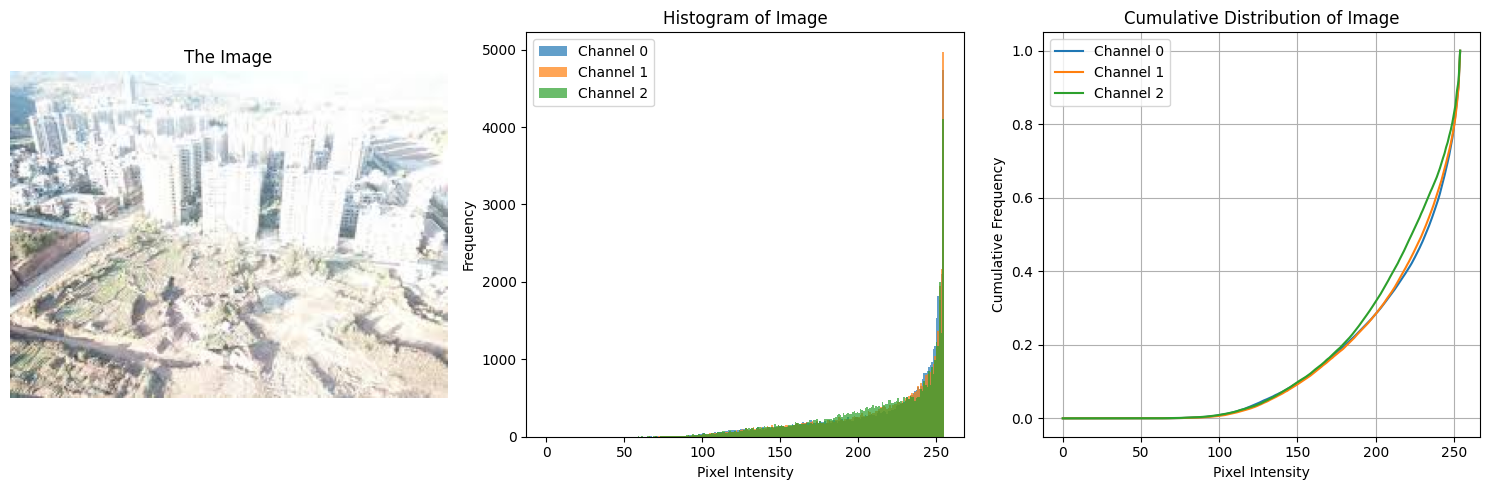

In [8]:
def see_image_hist_cdf_color(image_array):
  """
  Input: color image array
  Output: the histogram and CDF of the color image
  Function: Visualize the histogram and CDF of the image
  """

  if image_array is not None:
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    # The actual image
    axs[0].imshow(image_array)
    axs[0].set_title('The Image')
    axs[0].axis('off')
    # The histogram of three channels
    for i in range(3):
      axs[1].hist(image_array[:, :, i].flatten(), bins=256, range=(0, 255), color=f'C{i}', alpha=0.7)
    axs[1].set_title('Histogram of Image')
    axs[1].set_xlabel('Pixel Intensity')
    axs[1].set_ylabel('Frequency')
    axs[1].legend(['Channel 0', 'Channel 1', 'Channel 2'])
    # The CDF of the image
    for i in range(3):
      histogram, bin_edges = np.histogram(image_array[:, :, i].flatten(), bins=256, range=(0, 255))
      # Compute the cumulative distribution
      cumulative_distribution = np.cumsum(histogram)
      # Normalize the cumulative distribution
      cumulative_distribution_normalized = cumulative_distribution / cumulative_distribution[-1]
      # Display the cumulative distribution
      axs[2].plot(bin_edges[:-1], cumulative_distribution_normalized, color=f'C{i}')
    axs[2].set_title('Cumulative Distribution of Image')
    axs[2].set_xlabel('Pixel Intensity')
    axs[2].set_ylabel('Cumulative Frequency')
    axs[2].grid(True)
    axs[2].legend(['Channel 0', 'Channel 1', 'Channel 2'])
    plt.tight_layout()
    plt.show()

image_array = cv2.imread("/content/drive/MyDrive/AI6121_Assignment1/images/sample03.jpeg")
image_array = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)
see_image_hist_cdf_color(image_array)


In [9]:
# A proposed example
import cv2
import numpy as np

def he(rgb_image_array):
    """
    Perform histogram equalization on an RGB image.

    Args:
        rgb_image_array (numpy.ndarray): RGB image array.

    Returns:
        numpy.ndarray: RGB image after histogram equalization.
    """
    # Convert RGB image to YCrCb color space
    ycrcb_image = cv2.cvtColor(rgb_image_array, cv2.COLOR_RGB2YCrCb)

    # Split the Y, Cr, and Cb channels
    y, cr, cb = cv2.split(ycrcb_image)

    # Apply histogram equalization on the Y channel
    y_eq = cv2.equalizeHist(y)

    # Merge the equalized Y channel back with Cr and Cb channels
    ycrcb_eq_image = cv2.merge((y_eq, cr, cb))

    # Convert back to RGB color space
    rgb_eq_image = cv2.cvtColor(ycrcb_eq_image, cv2.COLOR_YCrCb2RGB)

    return rgb_eq_image

In [27]:
# A proposed example
import cv2
import numpy as np

def bbhe(rgb_image_array):
    """
    Perform Brightness Preserving Bi-Histogram Equalization (BBHE) on an RGB image.

    Args:
        rgb_image_array (numpy.ndarray): RGB image array.

    Returns:
        numpy.ndarray: RGB image after BBHE.
    """
    # Convert RGB image to YCrCb color space
    ycrcb_image = cv2.cvtColor(rgb_image_array, cv2.COLOR_RGB2YCrCb)

    # Split the Y, Cr, and Cb channels
    y, cr, cb = cv2.split(ycrcb_image)

    # Compute the mean of the Y channel
    mean_y = np.mean(y)

    # Create masks for the pixels in the Y channel
    mask_low = y <= mean_y
    mask_high = y > mean_y

    # Create a copy to store the equalized Y channel
    y_eq = np.copy(y)

    # Apply histogram equalization separately to both parts
    y_eq[mask_low] = cv2.equalizeHist(y[mask_low]).ravel()  # Flatten the result to 1D
    y_eq[mask_high] = cv2.equalizeHist(y[mask_high]).ravel()  # Flatten the result to 1D

    # Merge the equalized Y channel back with the original Cr and Cb channels
    ycrcb_eq_image = cv2.merge((y_eq, cr, cb))

    # Convert back to RGB color space
    rgb_eq_image = cv2.cvtColor(ycrcb_eq_image, cv2.COLOR_YCrCb2RGB)

    return rgb_eq_image


In [11]:
# A proposed example
import cv2
import numpy as np

def clahe(rgb_image_array):
    """
    Perform Contrast Limited Adaptive Histogram Equalization (CLAHE) on an RGB image.

    Args:
        rgb_image_array (numpy.ndarray): RGB image array.

    Returns:
        numpy.ndarray: RGB image after CLAHE.
    """
    # Convert RGB image to YCrCb color space
    ycrcb_image = cv2.cvtColor(rgb_image_array, cv2.COLOR_RGB2YCrCb)

    # Split the Y, Cr, and Cb channels
    y, cr, cb = cv2.split(ycrcb_image)

    # Create a CLAHE object with a specified clip limit and tile size
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

    # Apply CLAHE to the Y channel
    y_clahe = clahe.apply(y)

    # Merge the CLAHE enhanced Y channel back with the original Cr and Cb channels
    ycrcb_clahe_image = cv2.merge((y_clahe, cr, cb))

    # Convert back to RGB color space
    rgb_clahe_image = cv2.cvtColor(ycrcb_clahe_image, cv2.COLOR_YCrCb2RGB)

    return rgb_clahe_image


In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compare(rgb_image_array):
    """
    Compare different histogram equalization techniques on an RGB image by displaying the original image
    alongside the images processed with Histogram Equalization (HE), Brightness Preserving Bi-Histogram
    Equalization (BBHE), and Contrast Limited Adaptive Histogram Equalization (CLAHE).

    Args:
        rgb_image_array (numpy.ndarray): The input RGB image array.

    Displays:
        A plot with four images in a single row:
            1. Original image
            2. Image after applying Histogram Equalization (HE)
            3. Image after applying Brightness Preserving Bi-Histogram Equalization (BBHE)
            4. Image after applying Contrast Limited Adaptive Histogram Equalization (CLAHE)

    Returns:
        None
    """
    # Process the image using the different histogram equalization methods
    he_image_array = he(rgb_image_array)
    bbhe_image_array = bbhe(rgb_image_array)
    clahe_image_array = clahe(rgb_image_array)

    # Prepare the figure with 1 row and 4 columns
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))

    # List of images and their titles
    images = [rgb_image_array, he_image_array, bbhe_image_array, clahe_image_array]
    titles = ['Original', 'HE', 'BBHE', 'CLAHE']

    # Iterate over the images and display them
    for ax, img, title in zip(axes, images, titles):
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display with plt.imshow
        ax.set_title(title)
        ax.axis('off')  # Hide axes

    plt.tight_layout()
    plt.show()

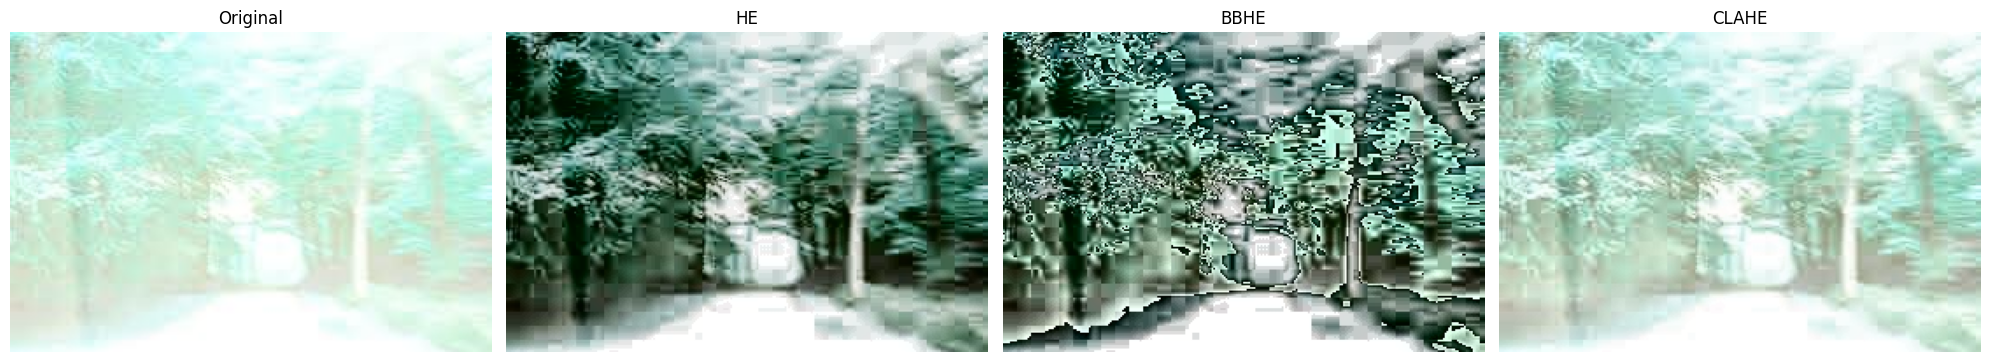

In [32]:
image_array = cv2.imread("/content/drive/MyDrive/AI6121_Assignment1/images/sample04.jpeg")
image_array = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)
compare(image_array)